# S(E)IR Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

In [2]:
# variables are based on the student number
POPULATION = 96e6
AVG_CONTACTS = 44
INFECTION_CHANCE = 0.09

LATENCY = 2
INFECTIOUS_TIMES = 5

$S(t) = $ Number of susceptible persons (currently healthy, never had been ill, not immune)  
$I(t) = $ Number of infected persons (currently have the disease)  
$R(t) = $ Number of recovered persons (immune, will not get sick or infect anybody)  
  
$\dot{S}(t) = -a \cdot S(t) \cdot I(t)$  
$\dot{I}(t) = a \cdot S(t) \cdot I(t) - b \cdot I(t)$  
$\dot{R}(t) = b \cdot I(t)$  
  
These formulas have the following coefficients:  
$a =$ transmission coefficient; depends on conditions  
$b =$ recovery coefficient; depends on disease

In [3]:
def seir_mod(n, h, i0, vacc_amount):
    """"""
    
    s = np.zeros(n + 1)  # Susceptible
    e = np.zeros(n + 1)  # Exposed
    i = np.zeros(n + 1)  # Infectious
    r = np.zeros(n + 1)  # Recovered
    t = np.zeros(n + 1)  # Time covered
    
    infection_rate = AVG_CONTACTS * INFECTION_CHANCE / POPULATION
    
    s[0] = POPULATION - i0 - vacc_amount
    e[0] = 0
    i[0] = i0
    r[0] = vacc_amount
    t[0] = 0
    
    for step in range(n):
        s2e = h * infection_rate * s[step] * i[step]
        e2i = h / LATENCY * e[step]
        i2r = h / INFECTIOUS_TIMES
        
        s[step + 1] = s[step] - s2e
        e[step + 1] = e[step] + s2e - e2i
        i[step + 1] = i[step] + e2i - i2r
        r[step + 1] = r[step] + i2r
        t[step + 1] = t[step] + h
    
    return s, e, i, r, t

In [4]:
total_time = 100
delta_h = 1.0

In [5]:
def seir_plot(seir_tuple):
    x = seir_tuple[4]
    
    plt.plot(x, seir_tuple[0], label="S")
    plt.plot(x, seir_tuple[1], label="E")
    plt.plot(x, seir_tuple[2], label="I")
    plt.plot(x, seir_tuple[3], label="R")
    
    plt.xlabel("Time in days")
    plt.ylabel("Population size")
    
    plt.legend()
    plt.show()

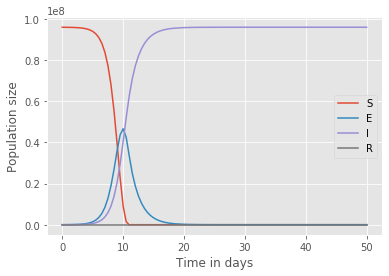

In [6]:
# without vaccination
seir_result = seir_mod(100, 0.5, 10e3, 0)
# print(seir_result)
seir_plot(seir_result)

## Prevending an epidemic
An disease outbreak is characterized as an epidemic when on one point in the outbreak more than 60 persons per 100.000 persons are infected by the disease/virus.

In [7]:
epidemic_limit = POPULATION * 0.0006
print(epidemic_limit)

57599.99999999999


In [8]:
for i in range(0, int(96e6), int(1e4)):
    seir_result = seir_mod(100, 1.0, 10e3, i)
    max_infected = seir_result[2].max()
    
    if max_infected < epidemic_limit:
        print("Min vaccines needed: {0}\nfor prefending an epidemic".format(i))
        break

c:\users\stan_\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
c:\users\stan_\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
c:\users\stan_\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Min vaccines needed: 95520000
for prefending an epidemic


The minimum amount of vaccinations needed to prevent an epidemic are: 95.520.000 vaccinations.